<a href="https://colab.research.google.com/github/LiviaFanucchi/Introducao-ciencias-de-dados/blob/master/AULA02_Tiago_Olist_exploraco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
!pip install -U gitly

Requirement already up-to-date: gitly in /usr/local/lib/python3.6/dist-packages (1.1.4)


In [72]:
!pip install pycep-correios

In [73]:
from gitly.colab.plot import GitlyPlotter

gitly = GitlyPlotter('git')
#gitly.config_render(renderer='colab')

# Carregar CSVs

In [74]:
import pandas as pd

In [75]:
df_clientes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ciencia de Dados/olist_customers_dataset.csv')
df_geo = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ciencia de Dados/olist_geolocation_dataset.csv')
df_compra_itens = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ciencia de Dados/olist_geolocation_dataset.csv')
df_compra_pagamentos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ciencia de Dados/olist_order_payments_dataset.csv')
df_reviews = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ciencia de Dados/olist_order_reviews_dataset.csv')
df_compras = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ciencia de Dados/olist_orders_dataset.csv')
df_produtos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ciencia de Dados/olist_products_dataset.csv')
df_vendedores = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ciencia de Dados/olist_sellers_dataset.csv')

In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Exploração das tabelas

## Clientes - olist_customers_dataset

In [77]:
df_clientes.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


### Info - Estrutura da tabela

In [78]:
#(linhas, colunas)
df_clientes.shape

(99441, 5)

In [79]:
# valores unicos em cada coluna
df_clientes.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

In [80]:
# nunique = qtd. valores unicos na coluna
# count = qtd. valores n]ao nulos na coluna
# size = qtd. de elemetos
df_clientes.agg( ['nunique', 'count', 'size'] )

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
nunique,99441,96096,14994,4119,27
count,99441,99441,99441,99441,99441
size,99441,99441,99441,99441,99441


### Info - Negócio

In [81]:
df_clientes.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [82]:
# Quantos clientes unicos
print( 'Qtd. de clientes únicos', df_clientes.customer_unique_id.nunique())

Qtd. de clientes únicos 96096


In [83]:
# Valeu Lore!
df_clientes_unique = df_clientes.drop_duplicates('customer_unique_id', keep='first')
df_clientes_unique.shape

(96096, 5)

In [84]:
df_clientes_unique.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


Top 5 **estados**

In [85]:
df_top5_estados = df_clientes_unique.customer_state.value_counts().head(5)
df_top5_estados

SP    40295
RJ    12377
MG    11255
RS     5277
PR     4882
Name: customer_state, dtype: int64

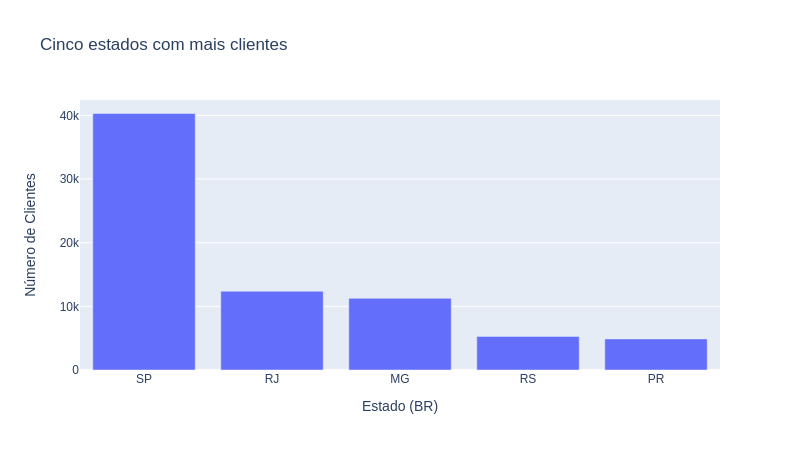

In [86]:
import plotly.express as px

fig = px.bar(df_top5_estados, y='customer_state', title='Cinco estados com mais clientes', labels={'customer_state': 'Número de Clientes', 'index':'Estado (BR)'})
gitly.show( fig )

Top 5 **cidades**

In [87]:
df_top5_cidade = df_clientes_unique.customer_city.value_counts().head(5)
df_top5_cidade

sao paulo         14971
rio de janeiro     6611
belo horizonte     2671
brasilia           2066
curitiba           1462
Name: customer_city, dtype: int64

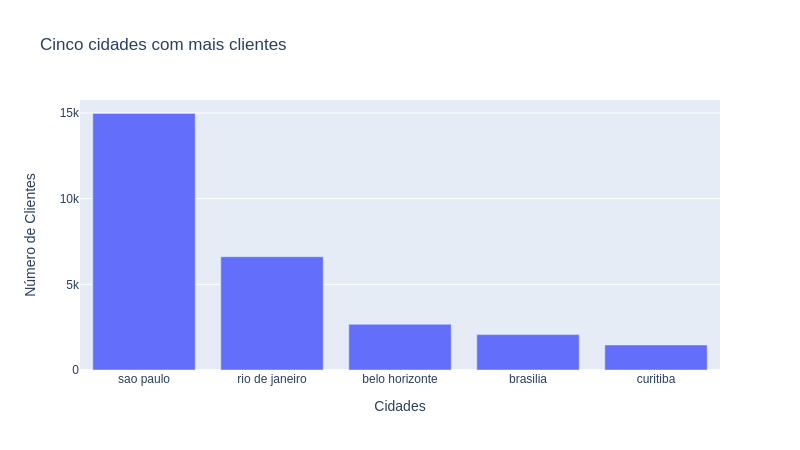

In [88]:
fig = px.bar(df_top5_cidade, y='customer_city', title='Cinco cidades com mais clientes', labels={'customer_city': 'Número de Clientes', 'index':'Cidades'})
gitly.show( fig )

Discussão

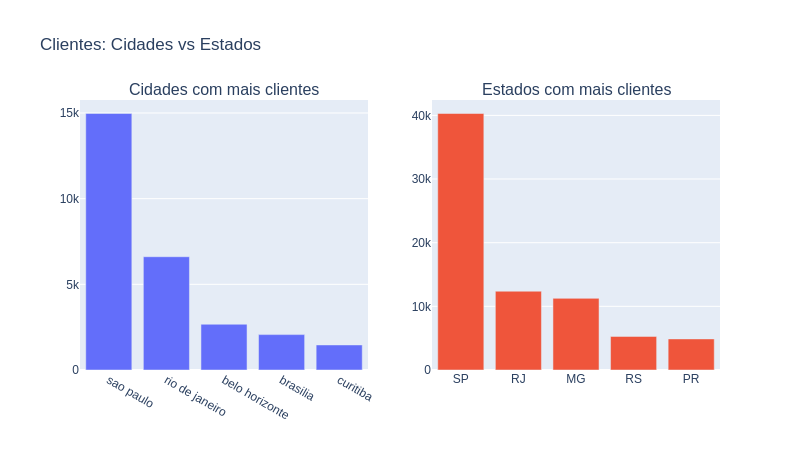

In [89]:
from plotly.subplots import make_subplots

fig = make_subplots( rows=1, cols=2, column_titles= ['Cidades com mais clientes', 'Estados com mais clientes'] )

fig.add_bar( x=df_top5_cidade.index , y=df_top5_cidade, row=1, col=1 )
fig.add_bar( x=df_top5_estados.index, y=df_top5_estados, row=1, col=2 )
fig.update_layout( dict( {'title':'Clientes: Cidades vs Estados'} ) )
fig.update_layout( dict( {'showlegend':False} ) )
gitly.show(fig)

Top 4 - Bairro/Distrito - Número de clientes

In [90]:
df_clientes_unique.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [91]:
df_top4_bairros = df_clientes_unique.customer_zip_code_prefix.value_counts().head(4).rename('qtd_clientes_bairro').reset_index()
df_top4_bairros

,index,qtd_clientes_bairro
0,22790,136
1,22793,119
2,24220,113
3,24230,112


In [92]:
# fonte https://imasters.com.br/back-end/python-consulta-de-cep-com-pycepcorreios
import pycep_correios

def bairro_cidade( cep ):
    end = pycep_correios.get_address_from_cep( str( cep ) + '000' )
    return '{} / {}'.format(end['bairro'], end['cidade'])

df_top4_bairros['distrito'] = df_top4_bairros['index'].apply( bairro_cidade )
df_top4_bairros

,index,qtd_clientes_bairro,distrito
0,22790,136,Recreio dos Bandeirantes / Rio de Janeiro
1,22793,119,Barra da Tijuca / Rio de Janeiro
2,24220,113,Icaraí / Niterói
3,24230,112,Icaraí / Niterói


## Produtos - olist_products_dataset

In [93]:
df_produtos.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


### Info - Estrutura

In [94]:
df_produtos.shape

(32951, 9)

In [95]:
# nunique = qtd. valores unicos na coluna
# count = qtd. valores n]ao nulos na coluna
# size = qtd. de elemetos
df_produtos.agg( ['nunique', 'count', 'size'] )

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
nunique,32951,73,66,2960,19,2204,99,102,95
count,32951,32341,32341,32341,32341,32949,32949,32949,32949
size,32951,32951,32951,32951,32951,32951,32951,32951,32951


In [96]:
df_produtos.product_category_name.fillna(value='nao informado', inplace=True)
df_produtos.agg( ['nunique', 'count', 'size'] )

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
nunique,32951,74,66,2960,19,2204,99,102,95
count,32951,32951,32341,32341,32341,32949,32949,32949,32949
size,32951,32951,32951,32951,32951,32951,32951,32951,32951


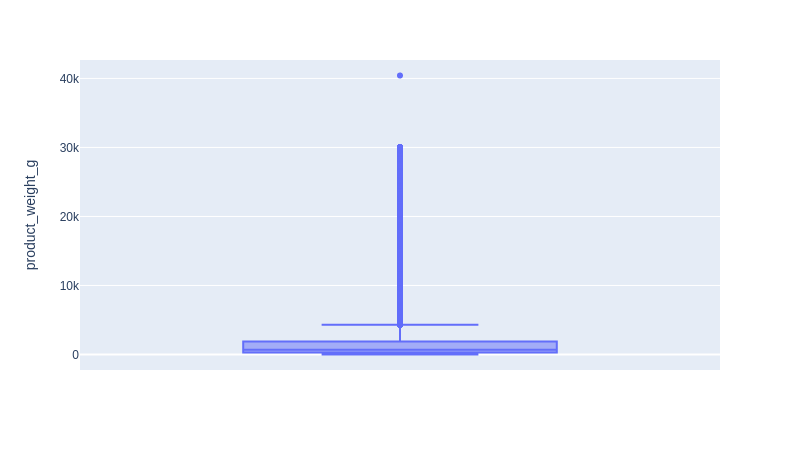

In [97]:
# Como esta a distribuição?
fig = px.box(df_produtos.product_weight_g, y="product_weight_g")
gitly.show(fig)

In [98]:
df_produtos.product_weight_g.median()

700.0

In [99]:
df_produtos.product_weight_g.mean()

2276.4724877841513

In [100]:
#df_produtos.fillna(method='ffil')
#df_produtos.fillna(value=0)
valor = df_produtos.product_weight_g.median()
df_produtos.product_weight_g.fillna(value=valor, inplace=True)

### Info - Negócio

In [101]:
df_produtos.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [102]:
df_categoria_mais_vendidas = df_produtos.product_category_name.value_counts().head(5).rename('qtd_prod_cat_ofertados')
df_categoria_mais_vendidas

cama_mesa_banho          3029
esporte_lazer            2867
moveis_decoracao         2657
beleza_saude             2444
utilidades_domesticas    2335
Name: qtd_prod_cat_ofertados, dtype: int64

In [103]:
import numpy as np

df_peso_medio_produtos = df_produtos.groupby( by='product_category_name' ).apply(np.mean)['product_weight_g']
df_peso_medio_produtos

product_category_name
agro_industria_e_comercio    5263.405405
alimentos                     923.414634
alimentos_bebidas            1307.932692
artes                        1691.763636
artes_e_artesanato           1164.578947
                                ...     
sinalizacao_e_seguranca      2969.817204
tablets_impressao_imagem      381.444444
telefonia                     236.506173
telefonia_fixa                660.827586
utilidades_domesticas        3020.793576
Name: product_weight_g, Length: 74, dtype: float64

In [104]:
df_mais_vendidos_peso_medio =  pd.merge(left=df_categoria_mais_vendidas, right=df_peso_medio_produtos, how='left', left_index=True, right_index=True)
df_mais_vendidos_peso_medio

,qtd_prod_cat_ofertados,product_weight_g
cama_mesa_banho,3029,2456.405084
esporte_lazer,2867,2024.670736
moveis_decoracao,2657,3008.266842
beleza_saude,2444,1434.793781
utilidades_domesticas,2335,3020.793576


## Compras - olist_orders_dataset

In [105]:
df_compras.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


### Info - Estrutura

In [106]:
df_compras.shape

(99441, 8)

In [107]:
df_compras.agg(['nunique','count','size'])

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
nunique,99441,99441,8,98875,90733,81018,95664,459
count,99441,99441,99441,99441,99281,97658,96476,99441
size,99441,99441,99441,99441,99441,99441,99441,99441


In [108]:
df_compras.fillna( method='ffill', inplace=True ) # Melhorem isso aqui!
df_compras.agg(['nunique','count','size'])

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
nunique,99441,99441,8,98875,90733,81018,95664,459
count,99441,99441,99441,99441,99441,99441,99441,99441
size,99441,99441,99441,99441,99441,99441,99441,99441


In [109]:
df_compras.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

### Info - Negócio

In [110]:
df_compras.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [111]:
df_compras.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [112]:
df_status = df_compras.order_status.value_counts()
df_status

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

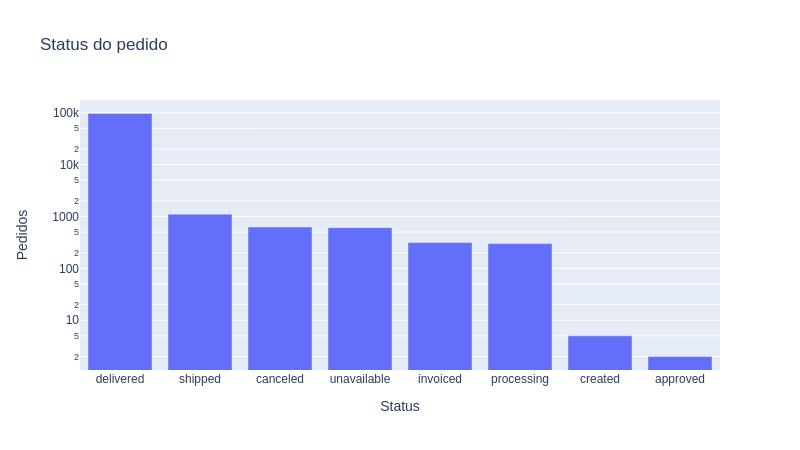

In [113]:
fig = px.bar(df_status, y='order_status', title='Status do pedido', log_y=True, labels={'order_status': 'Pedidos', 'index':'Status'})
gitly.show( fig )

### Data

In [114]:
df_compras.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [115]:
df_compras_dt = df_compras[['order_id', 'customer_id', 'order_status']].copy()
df_compras_dt.head(3)

,order_id,customer_id,order_status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered


In [116]:
# demonstração
pd.to_datetime( df_compras['order_purchase_timestamp'], format='%Y-%m-%d')

0       2017-10-02 10:56:33
1       2018-07-24 20:41:37
2       2018-08-08 08:38:49
3       2017-11-18 19:28:06
4       2018-02-13 21:18:39
                ...        
99436   2017-03-09 09:54:05
99437   2018-02-06 12:58:58
99438   2017-08-27 14:46:43
99439   2018-01-08 21:28:27
99440   2018-03-08 20:57:30
Name: order_purchase_timestamp, Length: 99441, dtype: datetime64[ns]

In [117]:
lista_colunas_datas = list( df_compras.iloc[:1, 3:].columns )
lista_colunas_datas

['order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date']

In [118]:
for coluna in lista_colunas_datas:
    df_compras_dt[coluna] = pd.to_datetime( df_compras[coluna], format='%Y-%m-%d')

df_compras_dt.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04


In [119]:
df_compras_dt.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [120]:
df_compras_dt.iloc[0,:]

order_id                         e481f51cbdc54678b7cc49136f2d6af7
customer_id                      9ef432eb6251297304e76186b10a928d
order_status                                            delivered
order_purchase_timestamp                      2017-10-02 10:56:33
order_approved_at                             2017-10-02 11:07:15
order_delivered_carrier_date                  2017-10-04 19:55:00
order_delivered_customer_date                 2017-10-10 21:25:13
order_estimated_delivery_date                 2017-10-18 00:00:00
Name: 0, dtype: object

Eficiência na entrega

In [121]:
em_tempo = (df_compras_dt.order_delivered_customer_date <= df_compras_dt.order_estimated_delivery_date).sum()
em_tempo

89996

In [122]:
total = (df_compras_dt.order_delivered_customer_date <= df_compras_dt.order_estimated_delivery_date).count()
total

99441

In [123]:
atrasados = total - em_tempo
atrasados

9445

In [124]:
fig = px.pie( values=[em_tempo, atrasados], names=['Dentro do Estimado','Atrasados'], title='Eficiência na Entrega')
fig.show()

In [125]:
df_compras_dt.head(3)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04


In [126]:
df_compras_dt['delivery_interval'] = df_compras_dt.order_delivered_customer_date - df_compras_dt.order_purchase_timestamp
df_compras_dt.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_interval
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8 days 10:28:40
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13 days 18:46:08
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 09:27:40


In [127]:
df_compras_dt['numeric_month'] =  df_compras_dt.order_purchase_timestamp.dt.month
df_compras_dt['month'] =  df_compras_dt.order_purchase_timestamp.dt.month_name()
df_compras_dt['year'] =  df_compras_dt.order_purchase_timestamp.dt.year
df_compras_dt.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_interval,numeric_month,month,year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8 days 10:28:40,10,October,2017
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13 days 18:46:08,7,July,2018
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 09:27:40,8,August,2018


In [128]:
df_compras_dt['days_delivery_interval'] = df_compras_dt.delivery_interval.dt.days
df_compras_dt.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_interval,numeric_month,month,year,days_delivery_interval
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8 days 10:28:40,10,October,2017,8
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13 days 18:46:08,7,July,2018,13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 09:27:40,8,August,2018,9


In [129]:
df_compras_mes =  df_compras_dt[['numeric_month','year','days_delivery_interval' ]].groupby( by='numeric_month' ).apply(np.mean)
df_compras_mes

,numeric_month,year,days_delivery_interval
numeric_month,,,
1,1.0,2017.900855,14.787334
2,2.0,2017.790785,19.312412
3,3.0,2017.728899,17.794198
4,4.0,2017.742695,13.106069
5,5.0,2017.650052,13.075381
6,6.0,2017.655227,11.290374
7,7.0,2017.609808,10.002326
8,8.0,2017.600572,7.801162
9,9.0,2017.002787,13.654588


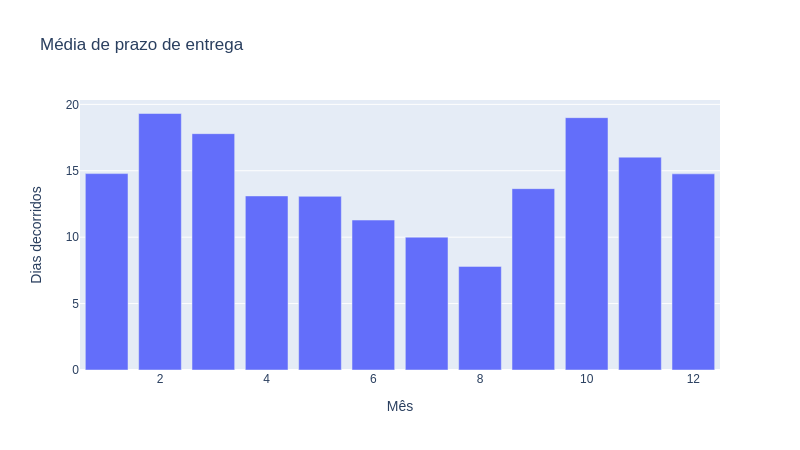

In [130]:
fig = px.bar(df_compras_mes, y='days_delivery_interval', title='Média de prazo de entrega', labels={'days_delivery_interval': 'Dias decorridos', 'index':'Mês'})
gitly.show( fig )

In [131]:
df_n_compras_mes = df_compras_dt.numeric_month.value_counts()
df_n_compras_mes_plot = df_n_compras_mes.reset_index().sort_values(by='index', ascending=True)
df_n_compras_mes_plot

,index,numeric_month
7,1,8069
6,2,8508
3,3,9893
5,4,9343
1,5,10573
4,6,9412
2,7,10318
0,8,10843
11,9,4305
10,10,4959


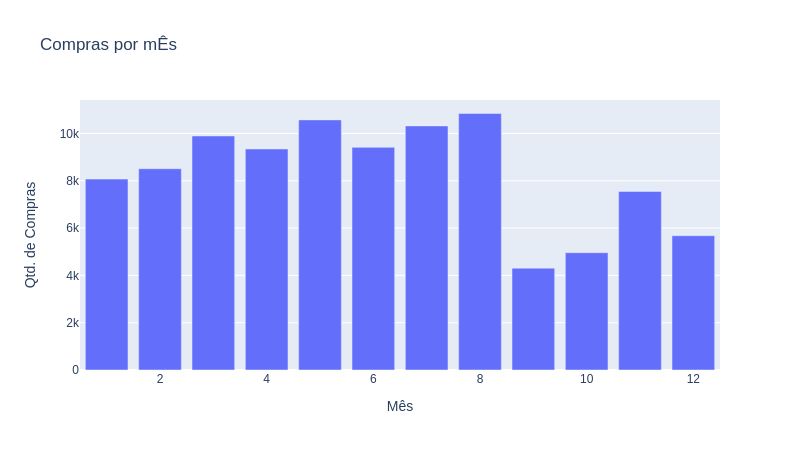

In [132]:
fig = px.bar(df_n_compras_mes_plot, x ='index' , y='numeric_month', title='Compras por mÊs', labels={'numeric_month': 'Qtd. de Compras', 'index':'Mês'})
gitly.show( fig )

In [133]:
df_compras_dt.order_purchase_timestamp.min()

Timestamp('2016-09-04 21:15:19')

In [134]:
df_compras_dt.order_purchase_timestamp.max()

Timestamp('2018-10-17 17:30:18')

In [135]:
df_compras_dt.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_interval,numeric_month,month,year,days_delivery_interval
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8 days 10:28:40,10,October,2017,8
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13 days 18:46:08,7,July,2018,13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 09:27:40,8,August,2018,9
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13 days 05:00:36,11,November,2017,13
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2 days 20:58:23,2,February,2018,2


In [136]:
df_compra_pagamentos.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [137]:
df_geo.head(3)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP


In [138]:
df_vendedores.head(3)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
